In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('Salary_dataset.csv')
data.drop(columns='Unnamed: 0')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
x_train = data['YearsExperience'].values
y_train = data['Salary'].values

<Axes: >

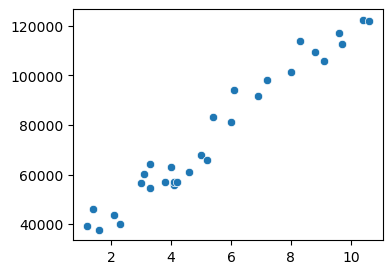

In [4]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=x_train, y=y_train, data=data)

In [5]:
rows = data.shape[0]
def compute_cost(x, y, w, b):
    mse = 0
    for i in range(rows):
        fn = w*x[i]+b
        mse += (fn - y[i])**2
    cost = mse * (1/2*rows)
    return cost

In [6]:
def compute_gradient(x, y, w, b):
    dw = 0
    db = 0
    for i in range(rows):
        fn = w*x[i]+b
        dw += (fn - y[i])*x[i]
        db += (fn - y[i])
    dw /= rows
    db /= rows
    return dw, db

In [7]:
def gradient_descent(x, y, w1, b1, learning_rate, epsilon=1e-6, max_i=5000):
    w = w1
    b = b1
    i = 0
    while True:
        dw, db = compute_gradient(x, y, w, b)
        gradient_norm = math.sqrt(dw**2+db**2)
        if gradient_norm<epsilon:
            break
        if i > max_i:
            break
        w -= learning_rate*dw
        b -= learning_rate*db
        i+=1
    return w, b



In [8]:
w_i = 0
b_i = 0
learning_rate = 0.01
w, b = gradient_descent(x_train, y_train, w_i, b_i, learning_rate, epsilon=1e-6, max_i=5000)
# Model: w*x+b

In [9]:
def predict(w, x, b):
    return (w * x + b)

Text(0.5, 1.0, 'Linear Regression analysis of Salary and Experience')

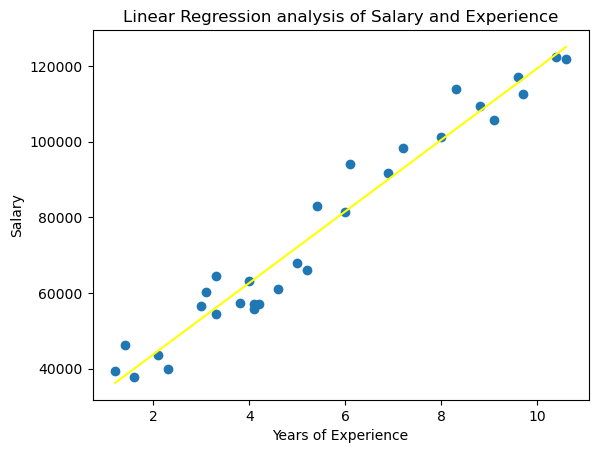

In [10]:
plt.scatter(x=x_train, y=y_train)
plt.plot(x_train, predict(w, x_train, b), color='yellow')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression analysis of Salary and Experience')

In [11]:
x = float(input("Enter experience: "))
y = predict(w, x, b)
print(f'Predicted Salary: {y}')

Predicted Salary: 72097.80742727342


In [ ]:
 
y_mean = y_train.mean()
ss_total = np.sum((y_train - y_mean)**2)
ss_reg = np.sum((predict(w, x_train, b) - y_mean)**2)
R = math.sqrt(ss_reg/ss_total)
R

0.9782534998042105